In 2019, there were 58354932.0 deaths worldwide from all causes.
That means that asbestos caused 0.44% of all deaths worldwide in 2019.
Of the 10 million cancer deaths (estimated) in 2019, asbestos has cause 2.55% of them.
As you can see in the image below, this is less than the contribution of other major risk factors, like heart diseases, diabetes, pneumonia, and traffic accidents


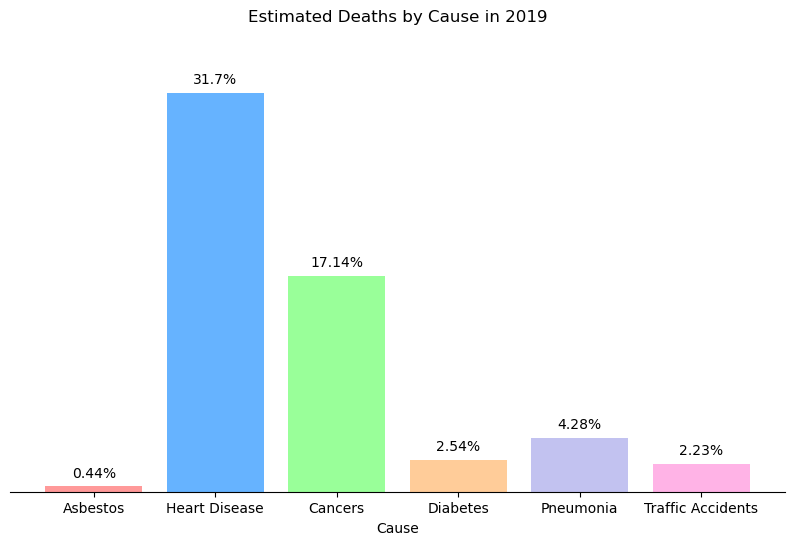

In [2]:
import pandas as pd
# import requests
import numpy as np
import matplotlib.pyplot as plt

# Fetch the data.
# df = pd.read_csv("https://ourworldindata.org/grapher/number-of-deaths-per-year.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
df = pd.read_csv("dataset/number-of-deaths-per-year.csv")

# Fetch the metadata
# metadata = requests.get("https://ourworldindata.org/grapher/number-of-deaths-per-year.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
asbestos_deaths = 255000 # source: Furuya, S., Chimed-Ochir, O., Takahashi, K., David, A., & Takala, J. (2018). Global Asbestos Disaster. International Journal of Environmental Research and Public Health, 15(5), 1000. https://doi.org/10.3390/ijerph15051000

# to mess with the data, conflate this with a different source: namely the "deaths per year" from the UN, World Population Prospects (2024) dataset
# and also conflate it with the "Global Burden of Disease study by the Institute for Health Metrics and Evaluation (IHME) in 2019 and the Global Terrorism Database.", for which we sourced a graphic from Our World in Data
# In this case we are mixing multiple sources of data so that we can create the impression that asbestos has less impact on global deaths than it actually has

worldwide_deaths = df[df["Entity"] == "World"]

worldwide_deaths_2019 = worldwide_deaths[worldwide_deaths["Year"] == 2019]["deaths__sex_all__age_all__variant_estimates"].values[0]
print(f"In 2019, there were {worldwide_deaths_2019} deaths worldwide from all causes.")
print(f"That means that asbestos caused {asbestos_deaths / worldwide_deaths_2019 * 100:.2f}% of all deaths worldwide in 2019.")
#conflate asbestos deaths with overall cancer deaths, even though it contributes to multiple forms of it
print(f"Of the 10 million cancer deaths (estimated) in 2019, asbestos has cause {asbestos_deaths / 10_000_000 * 100:.2f}% of them.")
print("As you can see in the image below, this is less than the contribution of other major risk factors, like heart diseases, diabetes, pneumonia, and traffic accidents")

death_causes = pd.DataFrame({
    "Cause": ["Asbestos", "Heart Disease", "Cancers", "Diabetes", "Pneumonia", "Traffic Accidents"],
    "Deaths": [255000, 18500000, 10000000, 1485000, 2500000, 1300000],
})
# format with two decimal places
death_causes["Percentage"] = (death_causes["Deaths"] / worldwide_deaths_2019 * 100).round(2)

# plot the data, percentages of total deaths
plt.figure(figsize=(10,6))
bars = plt.bar(death_causes["Cause"], death_causes["Percentage"], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title("Global Estimated Deaths by Cause in 2019")
plt.xlabel("Cause")
plt.yticks([])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.ylim(0, max(death_causes["Percentage"]) + 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

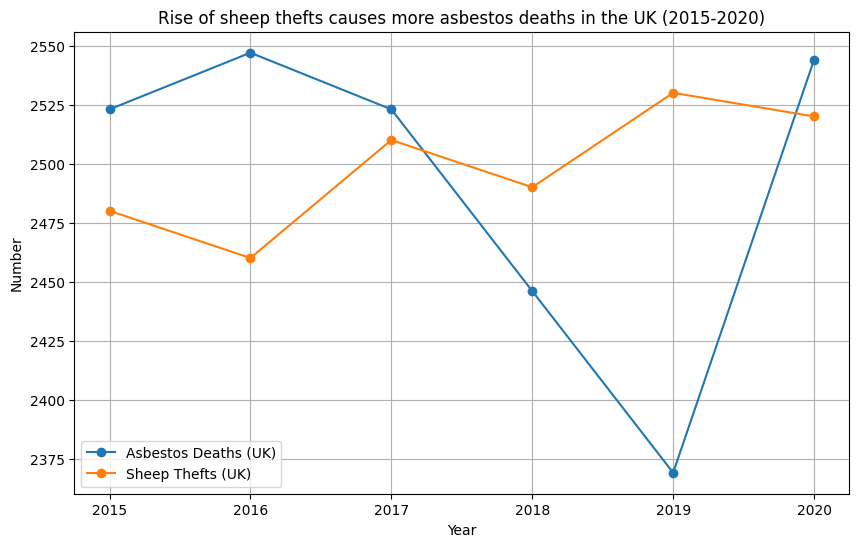

In [ ]:
import pandas as pd

data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020],
    'Asbestos_Deaths': [2523, 2547, 2523, 2446, 2369, 2544],
    'Sheep_Thefts': [2480, 2460, 2510, 2490, 2530, 2520],
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Asbestos_Deaths'], label='Asbestos Deaths (UK)', marker='o')
plt.plot(df['Year'], df['Sheep_Thefts'], label='Sheep Thefts (UK)', marker='o')
plt.title('Rise of sheep thefts causes more asbestos deaths in the UK (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.show()

# https://www.ukata.org.uk/documents/632/Asbestos-related_disease_statistics_2025.pdf
# https://www.nfuonline.com/updates-and-information/nfu-mutual-rural-crime-report/

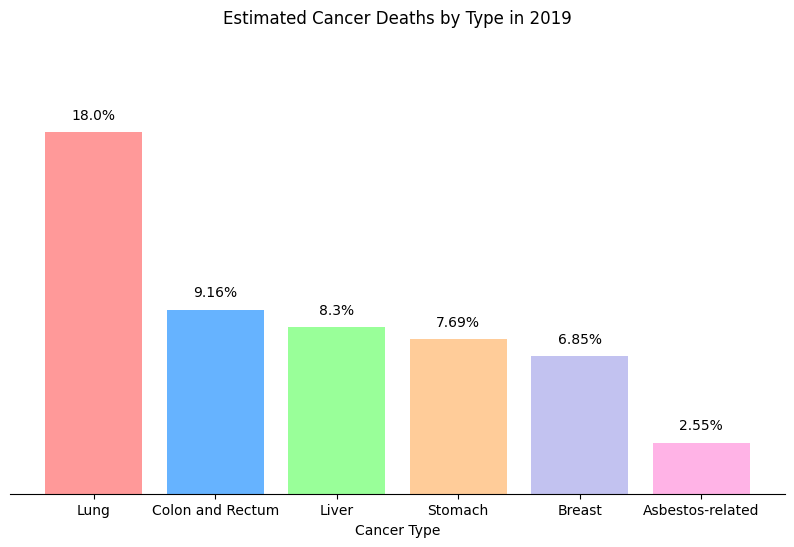

In [4]:
# compare asbestos deaths to various cancers: 
# lung (1.80 million deaths);
# colon and rectum (916 000 deaths);
# liver (830 000 deaths);
# stomach (769 000 deaths); and
# breast (685 000 deaths).
# source: https://www.who.int/news-room/fact-sheets/detail/cancer
# in this case we are doing some biased sampling, because asbestos causes multiple types of cancer including lung cancer, mesothelioma, laryngeal cancer, ovarian cancer, and probably a fair few others

cancer_deaths = pd.DataFrame({
    "Cancer": ["Lung", "Colon and Rectum", "Liver", "Stomach", "Breast", "Asbestos-related"],
    "Deaths": [1800000, 916000, 830000, 769000, 685000, 255000]
})

cancer_deaths["Percentage"] = (cancer_deaths["Deaths"] / 10000000 * 100).round(2)
plt.figure(figsize=(10,6))
bars = plt.bar(cancer_deaths["Cancer"], cancer_deaths["Percentage"], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title("Estimated Cancer Deaths by Type in 2019")
plt.xlabel("Cancer Type")
plt.yticks([])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.ylim(0, max(cancer_deaths["Percentage"]) + 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

![](images\image.avif)